# Credit Card Defect Detection

## Columns Detail

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 

default.payment.next.month: Default payment (1=yes, 0=no)


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine, text
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import sklearn.metrics as skmet

In [3]:
# Load Dataset
data = pd.read_csv(r"C:\PROJECTS\ineurone - Credit Card Default Prediction\UCI_Credit_Card.csv")

In [6]:
# Check Data Size
data.shape

(30000, 25)

In [8]:
# Columns check
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [39]:
# Describe data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [31]:
# first 5 rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
# last 5 rows
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [37]:
# Check Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [41]:
# Check null values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [43]:
# Copy data
df = data.copy()

In [45]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [47]:
# Rename columns name
df.rename(columns = {'PAY_0' : 'PAY_1'}, inplace = True)
df.rename(columns = {'default.payment.next.month' : 'def_pay'}, inplace = True)
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [49]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [60]:
# Check Column Data Value Count
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [62]:
# Check Column Data Value Count
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [64]:
# Check Column Data Value Count
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [66]:
# Check Column Data Value Count
df['def_pay'].value_counts()

def_pay
0    23364
1     6636
Name: count, dtype: int64

## Visualization

## AGE

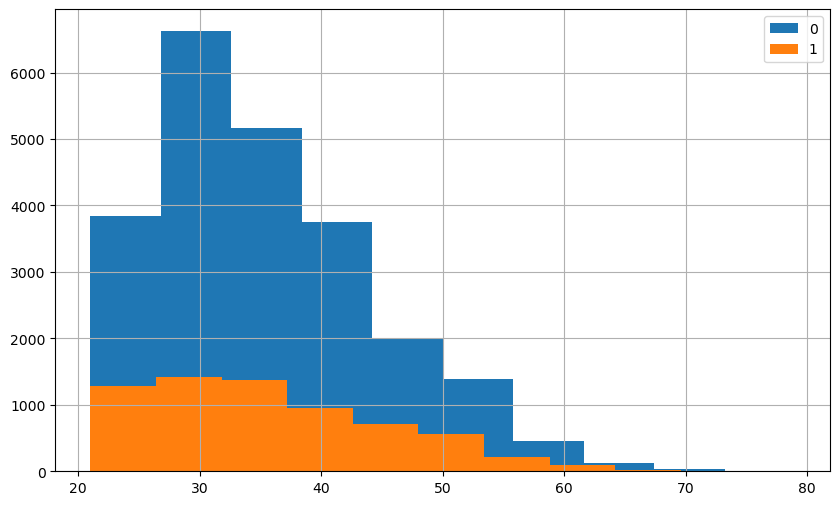

In [54]:
plt.figure(figsize=(10,6))
df.groupby('def_pay')['AGE'].hist(legend=True)
plt.show()

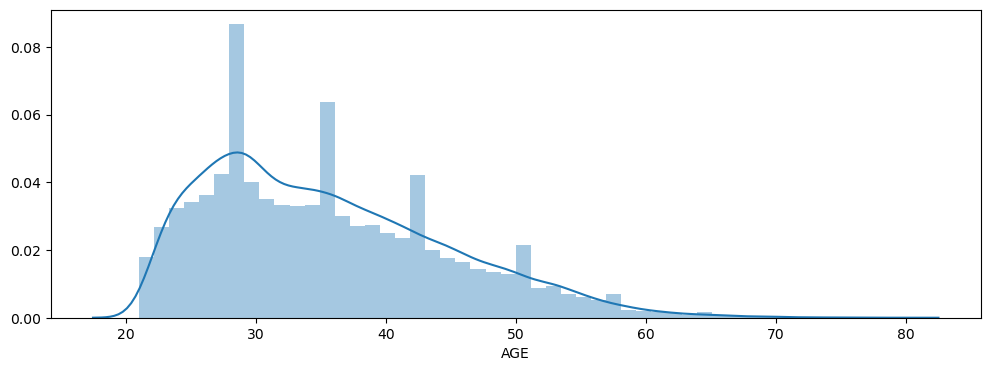

In [138]:
plt.figure(figsize=(12,4))
sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

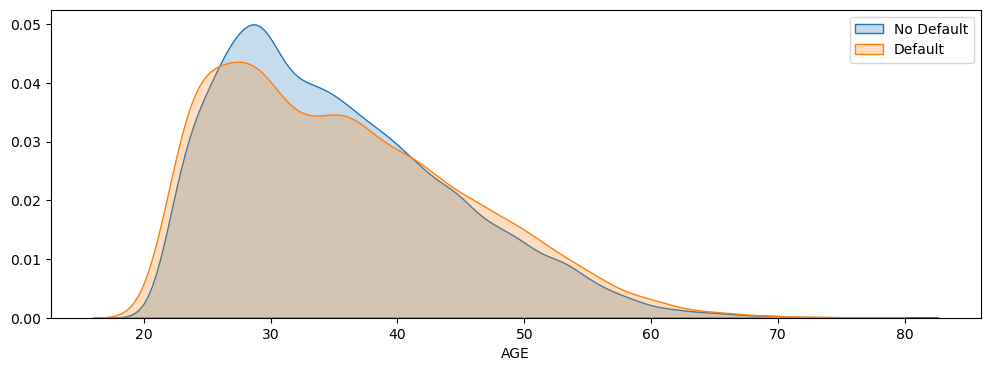

In [140]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['def_pay'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

In [144]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())
df['def_pay'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


AgeBin    def_pay
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: proportion, dtype: float64

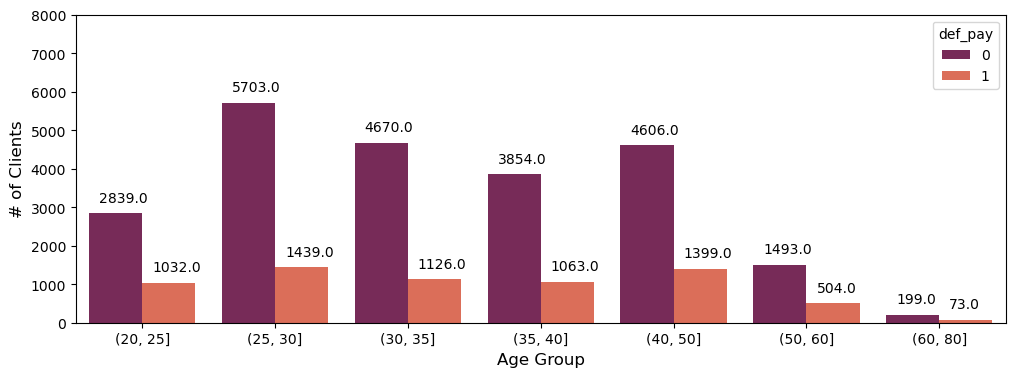

In [148]:
plt.figure(figsize=(12,4))
df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
ax = sns.countplot(data = df, x = 'AgeBin', hue="def_pay", palette = 'rocket', order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

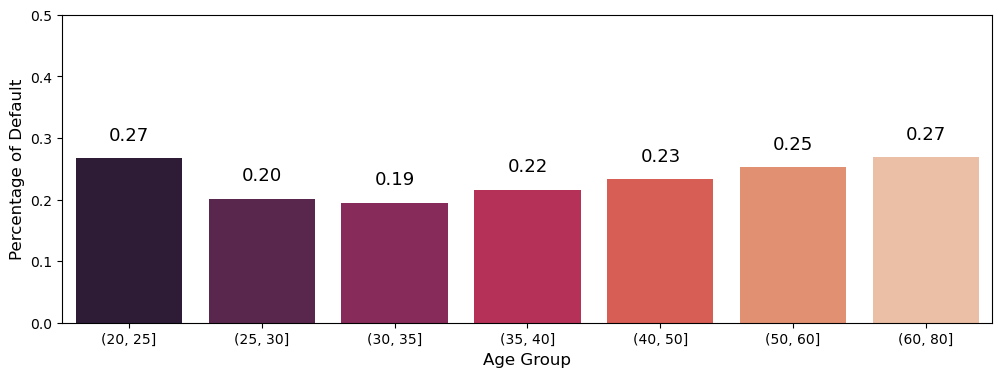

In [152]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "AgeBin", y = "def_pay", data = df, palette = 'rocket', ci = None, order = AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Percentage of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

## SEX

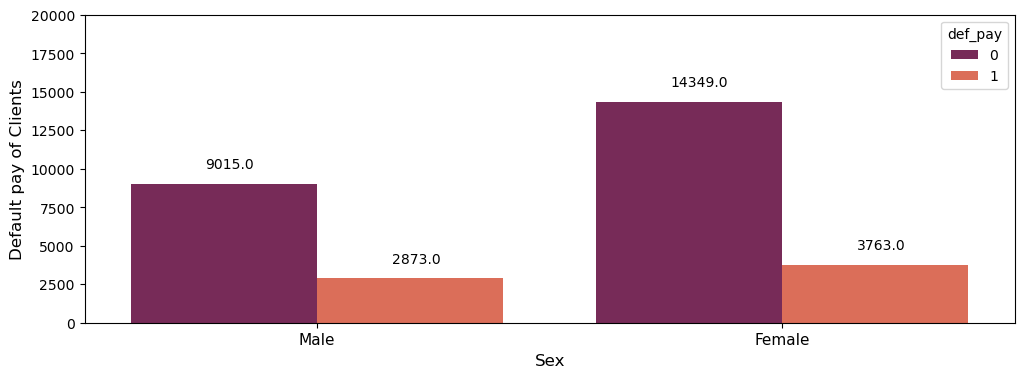

In [80]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'SEX', hue="def_pay", palette = 'rocket')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Default pay of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.show()

## EDUCATION

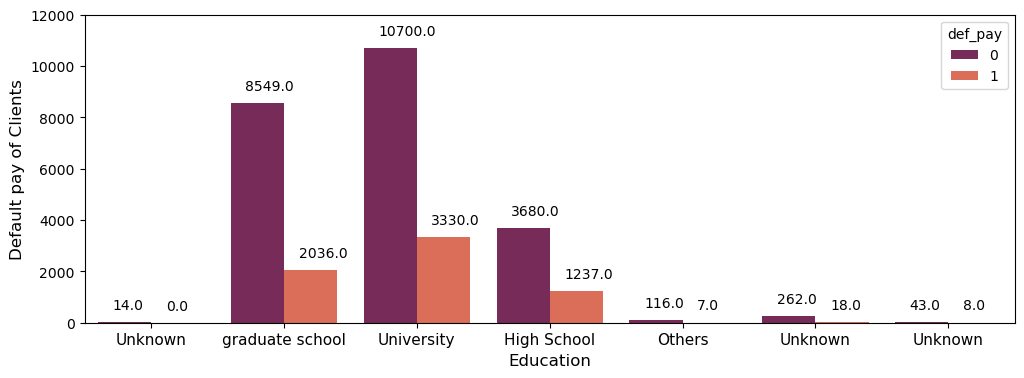

In [92]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'EDUCATION', hue="def_pay", palette = 'rocket')
plt.xlabel("Education", fontsize= 12)
plt.ylabel("Default pay of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6],['Unknown','graduate school','University','High School','Others','Unknown','Unknown'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

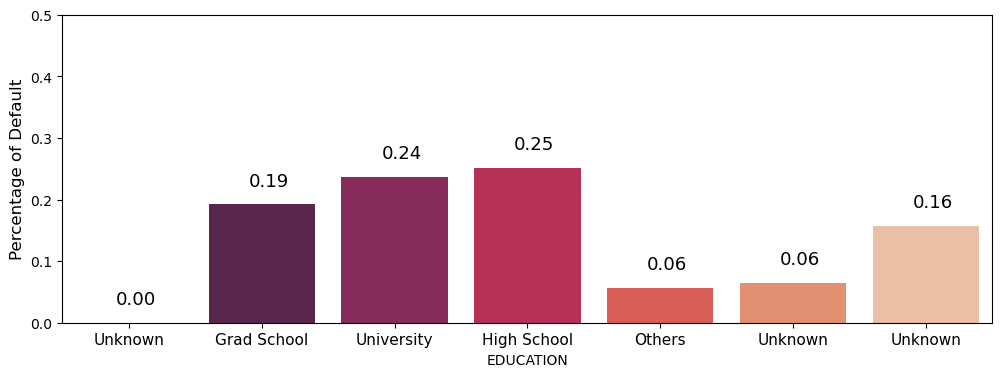

In [104]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "EDUCATION", y = "def_pay", data = df, palette = 'rocket', ci = None)
plt.ylabel("Percentage of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4,5,6],['Unknown','Grad School','University','High School','Others','Unknown','Unknown'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

## MARITAL STATUS

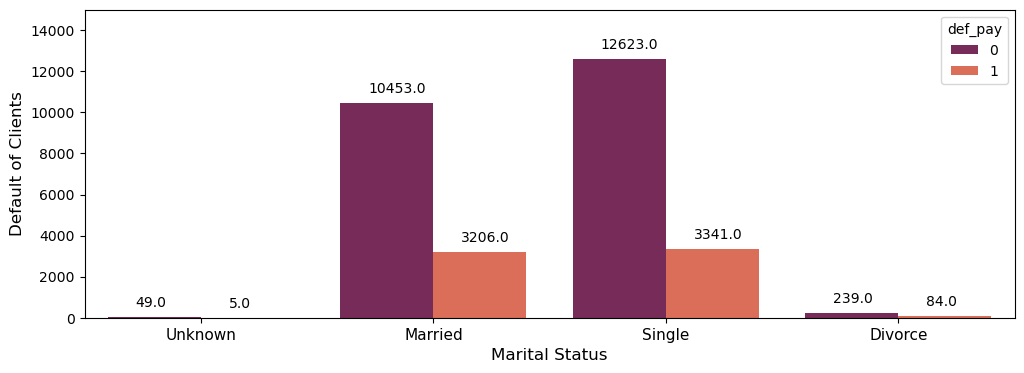

In [112]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'MARRIAGE', hue="def_pay", palette = 'rocket')
plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("Default of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))
plt.show()

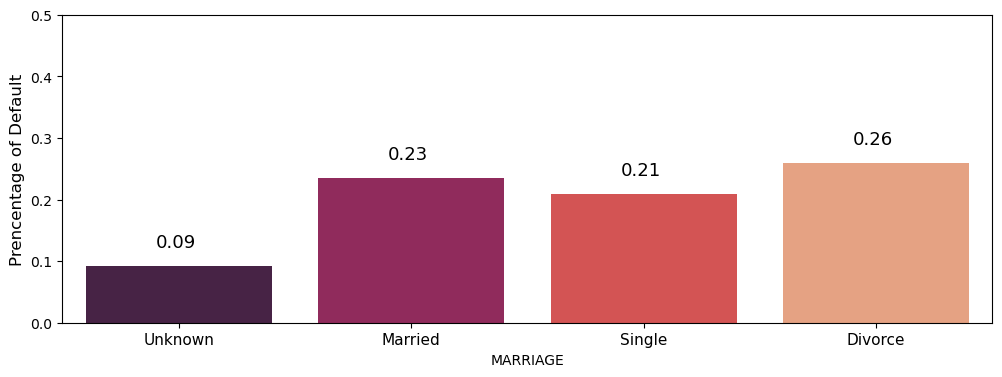

In [114]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "MARRIAGE", y = "def_pay", data = df, palette = 'rocket', ci = None)
plt.ylabel("Prencentage of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)
plt.show()

## SEX AND MARRIAGE

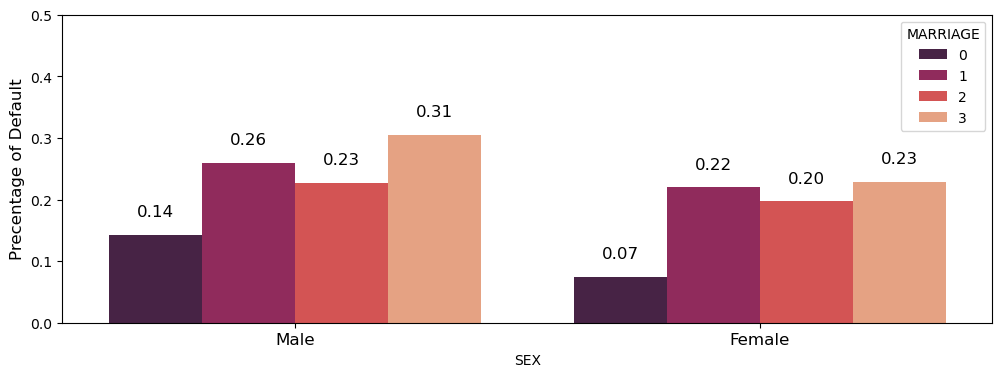

In [134]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "SEX", y = "def_pay", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)
plt.ylabel("Precentage of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)
plt.show()

## SEX AND EDUCATION

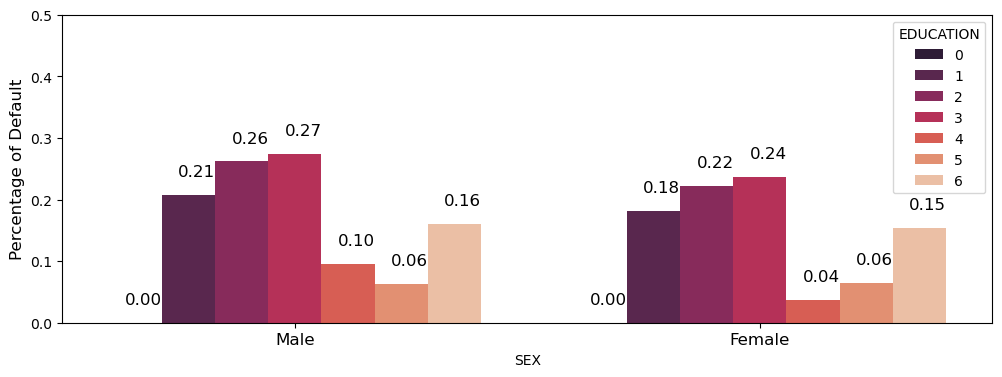

In [163]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x = "SEX", y = "def_pay", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)
plt.ylabel("Percentage of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)
plt.show()

## LIMIT BALANCE

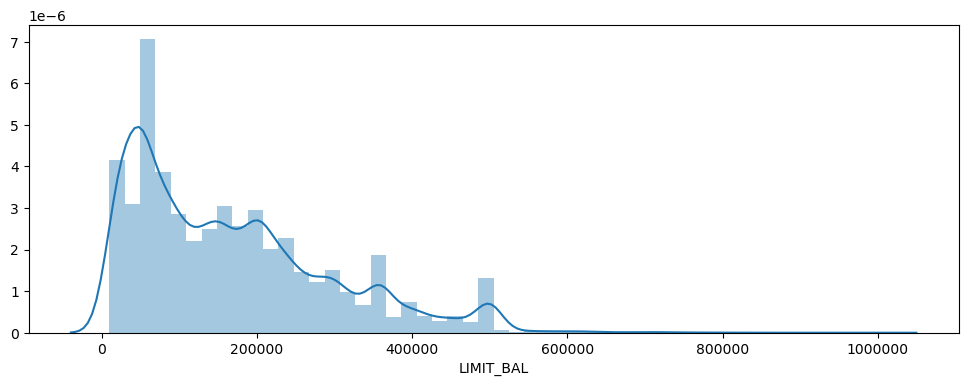

In [155]:
plt.figure(figsize=(12,4))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

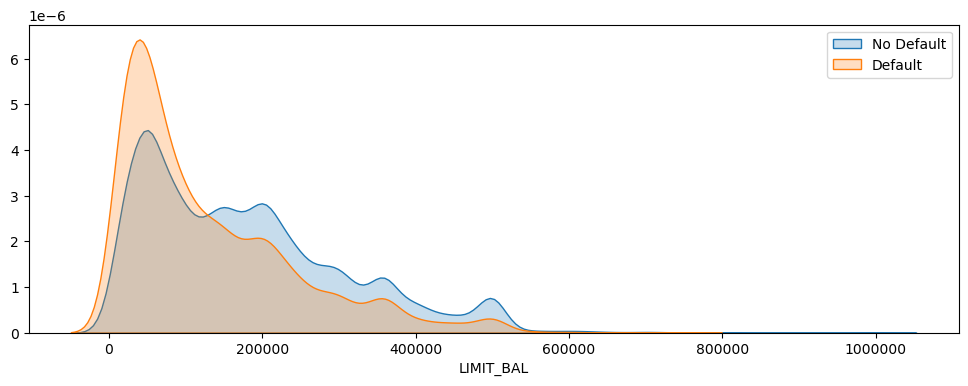

In [159]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['def_pay'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

In [167]:
df['LimitBin'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['LimitBin'].value_counts())
df['def_pay'].groupby(df['LimitBin']).value_counts(normalize = True)

LimitBin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: count, dtype: int64


LimitBin           def_pay
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: proportion, dtype: float64

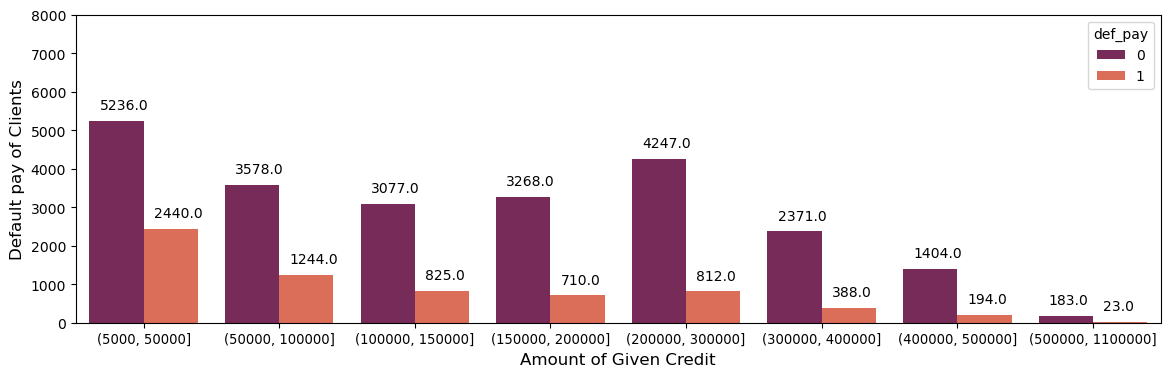

In [169]:
plt.figure(figsize=(14,4))
df['LimitBin'] = df['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']
ax = sns.countplot(data = df, x = 'LimitBin', hue="def_pay", palette = 'rocket', order = LimitBin_order)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Default pay of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

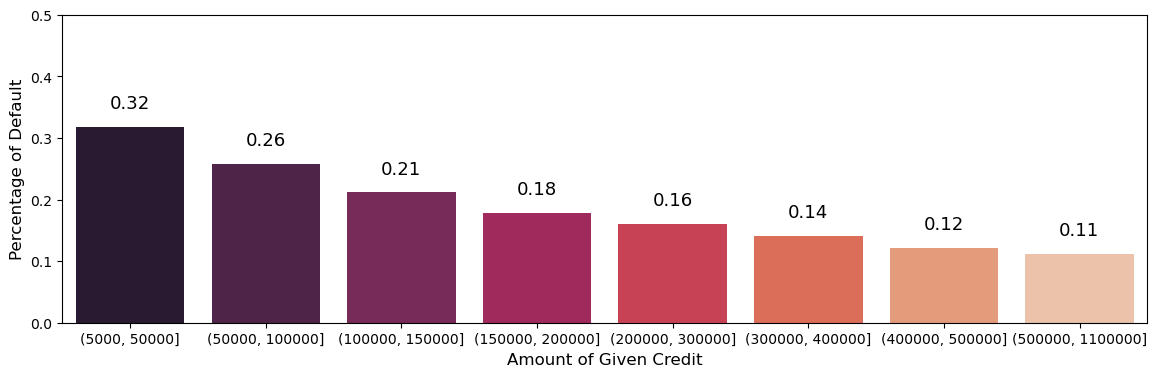

In [171]:
plt.figure(figsize=(14,4))
ax = sns.barplot(x = "LimitBin", y = "def_pay", data = df, palette = 'rocket', ci = None, order = LimitBin_order)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Percentage of Default", fontsize= 12)
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)
plt.show()

## AUTO EXPLORATORY DATA ANALYSIS / AUTO EDA

In [6]:
df1 = data.copy()

## Sweetviz

In [228]:
import sweetviz as sv

s = sv.analyze(df1)
s.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## D-Tale

In [261]:
import dtale

df1 = pd.read_csv(r"C:\PROJECTS\ineurone - Credit Card Default Prediction\UCI_Credit_Card.csv")
d = dtale.show(df1)
d.open_browser()

## Machine Learning Model Building

In [6]:
model_data = data.copy()

In [8]:
model_data = model_data.drop('ID', axis = 1)

In [10]:
model_data.rename(columns = {'PAY_0' : 'PAY_1'}, inplace = True)
model_data.rename(columns = {'default.payment.next.month' : 'def_pay'}, inplace = True)

In [12]:
x = model_data.drop(labels = 'def_pay', axis = 1)
y = model_data[['def_pay']]

In [14]:
# split the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [16]:
#check shape
x_train.shape

(24000, 23)

In [18]:
x_test.shape

(6000, 23)

In [20]:
# Standard Scaler
sc = StandardScaler()

In [22]:
# Fit StandardScaler 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression Model

In [24]:
# LogisticRegression
LRM = LogisticRegression()

In [26]:
# Fit Model
LRM.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Prediction
y_pred_lrm = LRM.predict(x_test)

In [30]:
# Check Accuracy
lrm_acc = accuracy_score(y_test, y_pred_lrm)
print("Logistic Regression model accuracy (in %):", lrm_acc*100)

Logistic Regression model accuracy (in %): 81.01666666666667


In [32]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_lrm))

[[4531  134]
 [1005  330]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

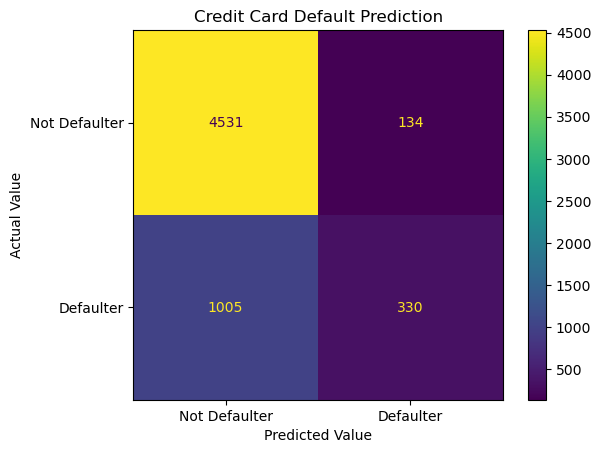

In [34]:
cm_lrm = skmet.confusion_matrix(y_test, y_pred_lrm)
cmplot_lrm = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_lrm, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_lrm.plot()
cmplot_lrm.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Hyper Parameter Tuning For Logistic Regression Model

In [37]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space} 

In [39]:
# Instantiating logistic regression classifier
lrm_grid = LogisticRegression()

In [41]:
# Instantiating the GridSearchCV object
lrm_grid_cv = GridSearchCV(lrm_grid, param_grid, cv = 5)

In [43]:
# Fit Hyper Parameter Tuning fit in data
lrm_grid_cv.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [45]:
# The best set of parameter values
lrm_grid_cv.best_params_

{'C': 0.4393970560760795}

In [47]:
# Model with best parameter values
lrm_grid_best = lrm_grid_cv.best_estimator_

In [49]:
# Prediction on Test Data
lrm_grid_preds = lrm_grid_best.predict(x_test)

In [51]:
# Accuracy
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lrm_grid_cv.best_params_))
print("Best score is {}".format(lrm_grid_cv.best_score_*100))

Tuned Decision Tree Parameters: {'C': 0.4393970560760795}
Best score is 77.88333333333334


In [53]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, lrm_grid_preds))

[[2208 2457]
 [ 586  749]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

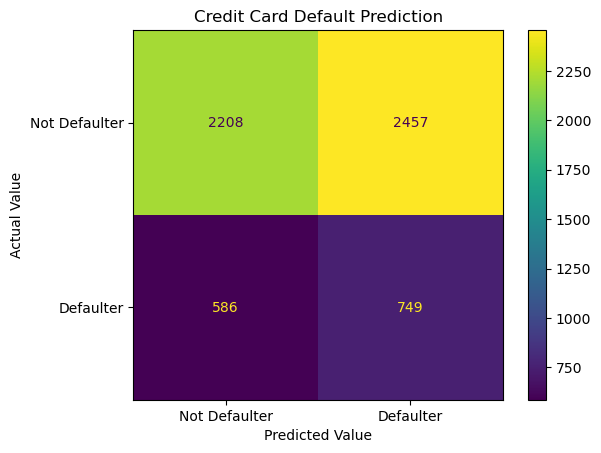

In [55]:
cm_lrm_ = skmet.confusion_matrix(y_test, lrm_grid_preds)
cmplot_lrm_ = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_lrm_, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_lrm_.plot()
cmplot_lrm_.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Decision Tree Model

In [66]:
# Decision Tree Model
DTM = DecisionTreeClassifier(criterion = 'entropy')

In [68]:
# Decision Tree Model Fit in data
DTM.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [70]:
# Prediction
y_pred_dtm = DTM.predict(x_test)

In [72]:
# Check Accuracy
dtm_acc = accuracy_score(y_test, y_pred_dtm)
print("Decision Tree model accuracy (in %):", dtm_acc*100)

Decision Tree model accuracy (in %): 78.28333333333333


In [74]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_dtm))

[[4072  593]
 [ 710  625]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

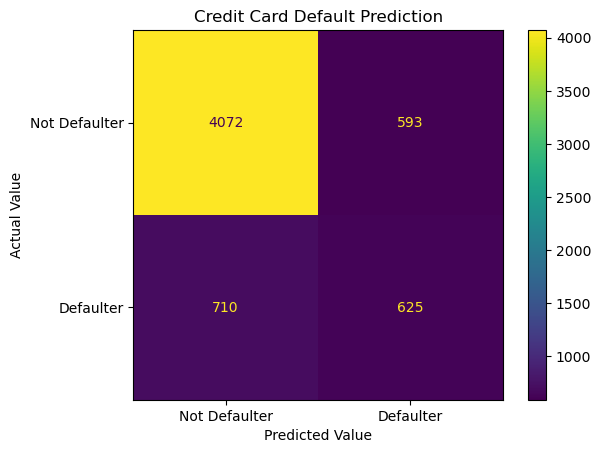

In [76]:
cm_dtm = skmet.confusion_matrix(y_test, y_pred_dtm)
cmplot_dtm = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_dtm, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_dtm.plot()
cmplot_dtm.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Hyper Parameter Tuning For Decision Tree Model

In [79]:
# hyper parameter optimizer
# create a dictionary of all hyperparameters to be experimented
param_grid_dtm = {'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

In [81]:
# Decision tree model
dtm_grid = DecisionTreeClassifier()

In [83]:
# GridsearchCV with cross-validation to perform experiments with parameters set
dtm_gscv = GridSearchCV(dtm_grid, param_grid_dtm, cv = 5, scoring = 'accuracy',
                          return_train_score = False, verbose = 1)

In [85]:
# Train the model with gridsearchcv optimization technique
dtm_gscv.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [87]:
# The best set of parameter values
dtm_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [89]:
# Model with best parameter values
DTM_best = dtm_gscv.best_estimator_

In [91]:
# Prediction on Test Data
dtm_preds = DTM_best.predict(x_test)

In [93]:
# Accuracy
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtm_gscv.best_params_))
print("Best score is {}".format(dtm_gscv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 4}
Best score is 82.075


In [95]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, dtm_preds))

[[4432  233]
 [ 825  510]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

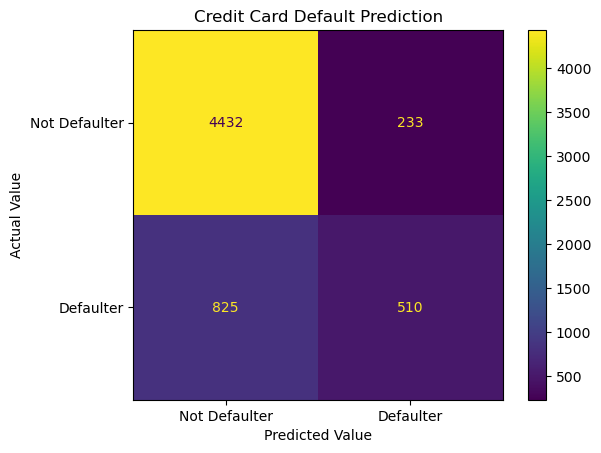

In [97]:
cm_dtm_ = skmet.confusion_matrix(y_test, dtm_preds)
cmplot_dtm_ = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_dtm_, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_dtm_.plot()
cmplot_dtm_.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Random Forest Model

In [100]:
# Random Forest Model
rf_model = RandomForestClassifier()

In [112]:
# Model Fit in Data
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [114]:
# Prediction on Test Data
rf_preds = rf_model.predict(x_test)

In [116]:
# Check Accuracy
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest model accuracy (in %):", rf_acc*100)

Random Forest model accuracy (in %): 81.96666666666667


In [118]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, rf_preds))

[[4399  266]
 [ 816  519]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

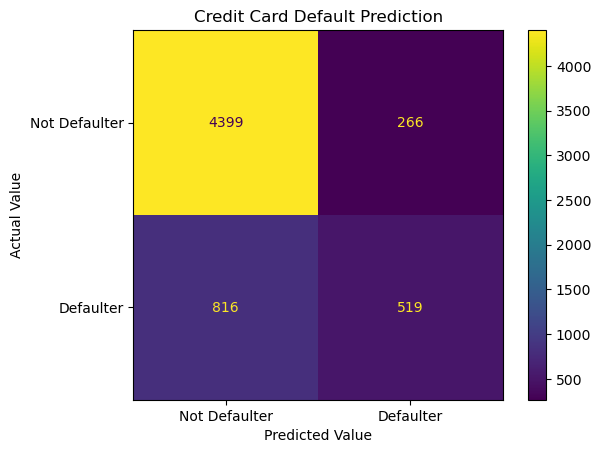

In [120]:
cm = skmet.confusion_matrix(y_test, rf_preds)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot.plot()
cmplot.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Hyper Parameter tuning For Random Forest Model

In [123]:
# Hyper Parameter Optimizer
rf_param_grid = {'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9]} 

In [125]:
# Hyperparameter optimization with GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv = 10, verbose = 1, n_jobs = -1)

In [127]:
# Train the model with gridsearchcv optimization technique
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=1)

In [129]:
# The best set of parameter values
rf_Grid.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [131]:
# Model with best parameter values
rf_best = rf_Grid.best_estimator_

In [133]:
# Prediction on Test Data
rfg_preds_ = rf_best.predict(x_test)

In [135]:
# Accuracy
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_Grid.best_params_))
print("Best score is {}".format(rf_Grid.best_score_*100))

Tuned Random Forest Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 25}
Best score is 81.50416666666666


In [137]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, rfg_preds_))

[[4488  177]
 [ 934  401]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

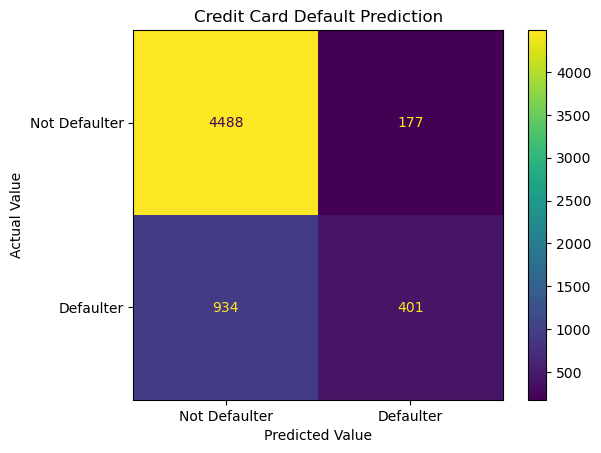

In [139]:
cm = skmet.confusion_matrix(y_test, rfg_preds_)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot.plot()
cmplot.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Support Vector Machine (SVM) Model

In [24]:
# Build the model
svm_model = SVC()

In [26]:
# Trained the model
svm_model.fit(x_train,y_train)

SVC()

In [146]:
# Prediction on Test Data
y_pred_svm = svm_model.predict(x_test)

In [147]:
# Check Accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) model accuracy (in %):", svm_acc*100)

Support Vector Machine (SVM) model accuracy (in %): 82.35


In [150]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, y_pred_svm))

[[4471  194]
 [ 865  470]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

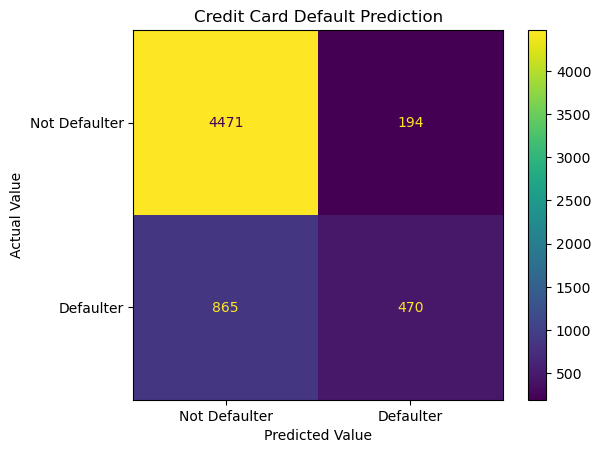

In [152]:
cm_svm = skmet.confusion_matrix(y_test, y_pred_svm)
cmplot_svm = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_svm.plot()
cmplot_svm.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Navi Bayes Model 

In [155]:
# Build Model
gnb = GaussianNB()

In [157]:
# Fit Model in Data
gnb.fit(x_train, y_train)

GaussianNB()

In [159]:
# Predict test data
gnb_pred = gnb.predict(x_test)

In [161]:
# Check Accuracy
gnb_acc = accuracy_score(y_test, gnb_pred)
print("Navi Bayes GaussianNB model accuracy (in %):", gnb_acc*100)

Navi Bayes GaussianNB model accuracy (in %): 74.45


In [163]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, gnb_pred))

[[3608 1057]
 [ 476  859]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

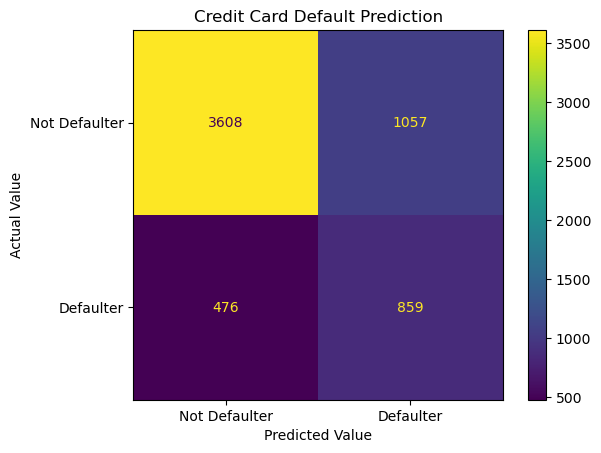

In [165]:
cm_gnb = skmet.confusion_matrix(y_test, gnb_pred)
cmplot_gnb = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_gnb, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_gnb.plot()
cmplot_gnb.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### XGBoost (eXtreme Gradient Boosting) Model

In [168]:
from xgboost import XGBClassifier

In [170]:
xgb_model = XGBClassifier()

In [172]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
# Predict test data
xgb_y_predict = xgb_model.predict(x_test)

In [176]:
# Check Accuracy
xgb_acc = accuracy_score(y_test, xgb_y_predict)
print("XGBoost (eXtreme Gradient Boosting)  model accuracy (in %):", xgb_acc*100)

XGBoost (eXtreme Gradient Boosting)  model accuracy (in %): 81.93333333333334


In [178]:
# Confusion Matrix
print(skmet.confusion_matrix(y_test, xgb_y_predict))

[[4395  270]
 [ 814  521]]


[Text(0.5, 1.0, 'Credit Card Default Prediction'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

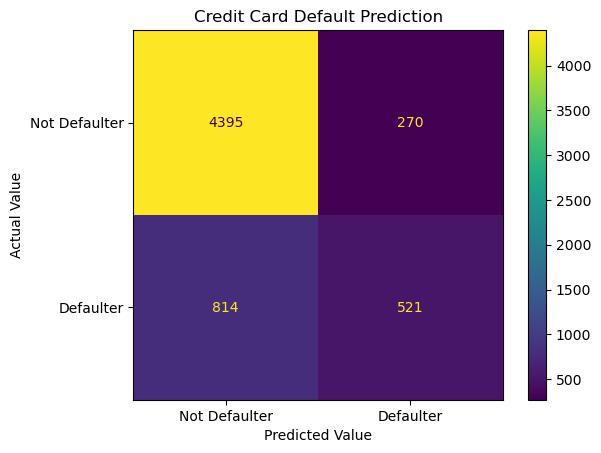

In [180]:
cm_xgb = skmet.confusion_matrix(y_test, xgb_y_predict)
cmplot_xgb = skmet.ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Not Defaulter', 'Defaulter'])
cmplot_xgb.plot()
cmplot_xgb.ax_.set(title = 'Credit Card Default Prediction', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### The Support Vector Machine (SVM) Model is Performs the High Accuracy Score is 82.35%.


In [184]:
import joblib
import pickle
import os

In [186]:
# Save the model to a pkl file
pickle.dump(svm_model,open('svm_model.pkl','wb'))
svm_model=pickle.load(open('svm_model.pkl','rb'))